In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Day 1

In [2]:
nums = [0]
with open("Day1.txt") as file:
    for line in file:
        if line == '\n':
            nums.append(0)
        else:
            nums[-1] += int(line)
print('Part 1: ' + str(max(nums)))
nums.sort(reverse=True)
print('Part 2: ' + str(sum(nums[:3])))

Part 1: 70116
Part 2: 206582


### Day 2

In [20]:
def parse(input):
    if input in ['A', 'X']: output = 1
    elif input in ['B', 'Y']: output = 2
    elif input in ['C', 'Z']: output = 3
    return output

score1 = 0
score2 = 0
with open("Day2.txt") as file: 
    for line in file:
        you = parse(line[0])
        me = parse(line[2])
        # Part 1
        score1 += me
        if me == you: score1 += 3
        elif me == you+1 or (me == 1 and you == 3): score1 += 6
        # Part 2
        if me == 1:
            score2 += you-1
            if you == 1: score2 += 3
        elif me == 2:
            score2 += you+3
        elif me == 3:
            score2 += you+7
            if you == 3: score2 -= 3        
print('Part 1: ' + str(score1))
print('Part 2: ' + str(score2))

Part 1: 10941
Part 2: 13071


### Day 3

In [21]:
def parse(input):
    output = ord(input)-96
    if output < 0: output = output+58
    return output

items = []
sum1 = 0
sum2 = 0
with open("Day3.txt") as file: 
    for line in file:
        line = line.strip('\n')
        items.append([parse(item) for item in line])
        # Part 1
        for item in items[-1][:int(len(line)/2)]:
            if item in items[-1][int(len(line)/2):]:
                sum1 += item
                break
        # Part 2
        if len(items) == 3:
            for item in items[0]:
                if item in items[1] and item in items[2]:
                    sum2 += item
                    break
            items = []        
print('Part 1: ' + str(sum1))
print('Part 2: ' + str(sum2))


Part 1: 7701
Part 2: 2644


### Day 4

In [48]:
counter1 = 0
counter2 = 0
with open("Day4.txt") as file: 
    for line in file:
        bounds = [[int(bound) for bound in section.split('-')] \
            for section in line.split(',')]
        cond = False
        for i in range(2):
            if bounds[i][0] <= bounds[(i+1)%2][0]:
                if bounds[i][1] >= bounds[(i+1)%2][1]:
                    counter1 += 1
                    cond = True
                    break
                elif bounds[i][1] >= bounds[(i+1)%2][0]:
                    cond = True
            elif bounds[i][0] <= bounds[(i+1)%2][1] and \
                bounds[i][1] >= bounds[(i+1)%2][1]:
                cond = True
        if cond: counter2 += 1
print('Part 1: ' + str(counter1))
print('Part 2: ' + str(counter2))

Part 1: 462
Part 2: 835


### Day 5

In [2]:
def read(line, stacks1, stacks2):
    index = 0
    while index < len(line):
        if line[index] == '[':
            for stack in [stacks1, stacks2]:
                stack[int(index/4)].insert(0, line[index+1]) 
        index += 4

def move(line, stacks1, stacks2):
    line = line.split('move ')[1]
    num = int(line.split(' from ')[0])
    line = line.split(' from ')[1]
    fro, to = [int(chars) for chars in line.split(' to ')]
    while num > 0:
        stacks1[to-1].append(stacks1[fro-1][-1])
        stacks2[to-1].append(stacks2[fro-1][-num])
        stacks1[fro-1].pop()
        stacks2[fro-1].pop(-num)
        num -= 1   

firstLine = True
with open("Day5.txt") as file:
    for line in file:
        if firstLine:
            stacks1 = [[] for i in range(int(len(line)/4))]
            stacks2 = [[] for i in range(int(len(line)/4))]
            firstLine = False
        if all(char in [' ', '\n'] for char in line) or line[1] == '1':
            continue
        elif line[0] == 'm':
            move(line, stacks1, stacks2)
        else:
            read(line, stacks1, stacks2)

solution = ''
for stack in stacks1:
    solution += stack[-1]
print('Part 1: ' + solution)
solution = ''
for stack in stacks2:
    solution += stack[-1]
print('Part 2: ' + solution)


Part 1: GFTNRBZPF
Part 2: VRQWPDSGP


### Day 6

In [9]:
with open("Day6.txt") as file:
    for line in file:
        for part in [0, 1]:
            pos = 3+10*part
            while True:
                segment = line[pos-(3+10*part):pos+1]
                if len(set(segment)) == len(segment):
                    print('Part %i: ' % (part+1) + str(pos+1))
                    break
                pos += 1

Part 1: 1909
Part 2: 3380


### Day 7

In [55]:
path = ""
dirSizes = {}
with open("Day7.txt") as file:
    for line in file:
        if line[0:3] == "$ c":
            dir = line.split("$ cd ")[1].strip("\n")
            if dir == "..":
                oldPath = path
                path = oldPath.rsplit("/", 2)[0] + "/"
                if path not in dirSizes.keys():
                    dirSizes[path] = dirSizes[oldPath]
                else:
                    dirSizes[path] += dirSizes[oldPath]
            else:
                path += dir + "/"
        else:
            if line[0] == "$" or line[0] == "d":
                continue
            else:
                size = int("".join(char for char in line if char.isdigit()))
                if path not in dirSizes.keys():
                    dirSizes[path] = size
                else:
                    dirSizes[path] += size

sum = 0
needed = 30000000-(70000000-dirSizes["//"])
found = dirSizes["//"]
for dirSize in dirSizes.values():
    if dirSize <= 100000: sum += dirSize
    if dirSize >= needed and dirSize < found: found = dirSize
print("Part 1: " + str(sum))
print("Part 2: " + str(found))

        

Part 1: 1581595
Part 1: 1544176


### Day 8

In [118]:
def calcScore(tree, i, segment, score):
    if i%2 == 0: segment = reversed(list(segment))
    for thisTree in segment:
        score[i] += 1
        if thisTree >= tree: break

grid = []
with open("Day8.txt") as file:
    for line in file:
        grid.append([])
        for char in line.strip():
            grid[-1].append(int(char))
grid = np.asarray(grid)
counter = 0
scores = np.zeros(tuple(grid.shape))
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        score = np.zeros(4)
        segments = [grid[:i, j], grid[i+1:, j], grid[i, :j], grid[i, j+1:]]
        if any(all(tree < grid[i, j] for tree in segment) for segment in segments): counter += 1
        for k, segment in enumerate(segments):
            calcScore(grid[i, j], k, segment, score)
        scores[i, j] = np.prod(score)
print("Part 1: " + str(counter))
print("Part 2: " + str(int(np.amax(scores))))
        


Part 1: 1787
Part 2: 440640


### Day 9

In [151]:
def checkPosTail(posTail, posHead):
    posTail, posHead = [list(pos) for pos in [posTail, posHead]]
    if posHead[0] == posTail[0] and posHead[1] > posTail[1]+1:
        posTail[1] += 1
    elif posHead[0] == posTail[0] and posHead[1] < posTail[1]-1:
        posTail[1] -= 1
    elif posHead[1] == posTail[1] and posHead[0] > posTail[0]+1:
        posTail[0] += 1
    elif posHead[1] == posTail[1] and posHead[0] < posTail[0]-1:
        posTail[0] -= 1
    elif (posHead[0] >= posTail[0]+1 and posHead[1] > posTail[1]+1) \
        or (posHead[1] >= posTail[1]+1 and posHead[0] > posTail[0]+1):
        posTail[0] += 1
        posTail[1] += 1
    elif (posHead[0] <= posTail[0]-1 and posHead[1] > posTail[1]+1) \
        or (posHead[1] >= posTail[1]+1 and posHead[0] < posTail[0]-1):
        posTail[0] -= 1
        posTail[1] += 1
    elif (posHead[0] >= posTail[0]+1 and posHead[1] < posTail[1]-1) \
        or (posHead[1] <= posTail[1]-1 and posHead[0] > posTail[0]+1):
        posTail[0] += 1
        posTail[1] -= 1
    elif (posHead[0] <= posTail[0]-1 and posHead[1] < posTail[1]-1) \
        or (posHead[1] <= posTail[1]-1 and posHead[0] < posTail[0]-1):
        posTail[0] -= 1
        posTail[1] -= 1
    return tuple(posTail)

def moveRope(length):
    poses = [(0, 0) for i in range(length)]
    posesTail = []
    with open("Day9.txt") as file:
        for line in file:
            dir, steps = line.strip().split(' ')
            for i in range(int(steps)):
                posHead = list(poses[0])
                if dir == 'R':
                    posHead[0] += 1
                elif dir == 'L':
                    posHead[0] -= 1
                elif dir == 'U':
                    posHead[1] += 1
                elif dir == 'D':
                    posHead[1] -= 1
                poses[0] = tuple(posHead)
                for j in range(1, length):
                    poses[j] = checkPosTail(poses[j], poses[j-1])
                if poses[length-1] not in posesTail:
                    posesTail.append(poses[length-1])
    return str(len(posesTail))

print("Part 1: " + moveRope(2))
print("Part 2: " + moveRope(10))

            

Part 1: 5513
Part 2: 2427


### Day 10

Part 1: 14160


Text(0.5, 1.0, 'Part 2')

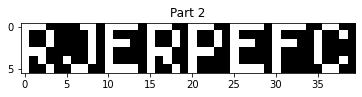

In [30]:
cycle = 0
X = 1

# Part 1
cycles = np.linspace(20, 220, num=6, dtype=int)
sum = 0

def part1(sum, cycle, X):
    if cycle in cycles: sum += cycle*X
    return sum

# Part 2
CRT = np.zeros((6, 40))

def part2(CRT, cycle, X):
    if cycle%40 in [X-1, X, X+1]: CRT[cycle//40, cycle%40] = 1
    return CRT
    
with open("Day10.txt") as file:
    for line in file:
        if line[0] == "n":
            CRT = part2(CRT, cycle, X)
            cycle += 1
            sum = part1(sum, cycle, X)
        elif line[0] == "a":
            for i in range(2):
                CRT = part2(CRT, cycle, X)
                cycle += 1
                sum = part1(sum, cycle, X)
            X += int(line.split("addx ")[1].strip("\n"))
print("Part 1: " + str(sum))
cmapbw = ListedColormap(['k', 'w'], N=2)
plt.imshow(CRT, cmap=cmapbw, vmin=0, vmax=1)
plt.title("Part 2")

### Day 11

In [74]:
def readFile():
    monkeys = []
    items = {}
    operation = {}
    test = {}
    with open("Day11.txt") as file:
        for line in file:
            line = line.strip()
            if line == "":
                continue
            if line[0] == "M":
                monkeys.append(int("".join(char for char in line if char.isdigit())))
            elif line[0] == "S":
                startItems = line.split("Starting items: ")[1].split(", ")
                items[monkeys[-1]] = [int(item) for item in startItems]
            elif line[0] == "O":
                if "*" in line:
                    operation[monkeys[-1]] = ["*"]
                elif "+" in line:
                    operation[monkeys[-1]] = ["+"]
                inte = "".join(char for char in line if char.isdigit())
                if len(inte) == 0:
                    operation[monkeys[-1]].append(-1)
                else:
                    operation[monkeys[-1]].append(int(inte))
            elif line[0] == "T":
                test[monkeys[-1]] = [int("".join(char for char in line if char.isdigit()))]
            else:
                test[monkeys[-1]].append(int("".join(char for char in line if char.isdigit())))
    return monkeys, items, operation, test

def monkeyinthemiddle(part, numRounds):
    monkeys, items, operation, test = readFile()
    inspects = {}
    for monkey in monkeys:
        inspects[monkey] = 0
    if part == 2:
        prod = np.prod([value[0] for value in test.values()])
    for i in range(numRounds):
        for monkey in monkeys:
            for item in items[monkey]:
                inspects[monkey] += 1
                if operation[monkey][0] == "*":
                    if operation[monkey][1] == -1:
                        fear = item * item
                    else:
                        fear = item * operation[monkey][1]
                elif operation[monkey][0] == "+":
                    if operation[monkey][1] == -1:
                        fear = item + item
                    else:
                        fear = item + operation[monkey][1]
                if part == 1:
                    fear //= 3
                elif part == 2:
                    fear %= prod
                if fear%test[monkey][0] == 0:
                    items[test[monkey][1]].append(fear)
                else:
                    items[test[monkey][2]].append(fear)
            items[monkey] = []     
    return str(np.prod(sorted(inspects.values())[-2:]))   
 
print("Part 1: " + monkeyinthemiddle(1, 20))
print("Part 2: " + monkeyinthemiddle(2, 10000))

Part 1: 78678
Part 2: 15333249714
